In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

2025-03-01 00:41:31.854598: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load dataset
file_path = 'All_sorted_stock_data_cleaned_nica.csv'
data_all = pd.read_csv(file_path)

In [3]:

# Train-Test Split
data_train = data_all[:int(len(data_all)*0.80)]
data_test = data_all[int(len(data_all)*0.80):]


In [4]:
# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0,1))
data_train_scaled = scaler.fit_transform(data_train)

In [5]:
data_train_scaled

array([[0.48789809, 0.46419437, 0.49014455, ..., 0.00414162, 0.27394474,
        0.09914381],
       [0.46496815, 0.45652174, 0.47568988, ..., 0.00666046, 0.27394474,
        0.09733002],
       [0.45350318, 0.45012788, 0.4717477 , ..., 0.00698409, 0.27394474,
        0.09632236],
       ...,
       [0.56050955, 0.61508951, 0.5913272 , ..., 0.19504816, 0.76250212,
        0.0260556 ],
       [0.61146497, 0.60741688, 0.62417871, ..., 0.07429627, 0.76250212,
        0.02628756],
       [0.62420382, 0.61764706, 0.63600526, ..., 0.06182775, 0.76250212,
        0.02628756]])

In [6]:
# Convert data into sequences
def create_sequences(data, seq_length=30):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 30  # Lookback period
X_train, y_train = create_sequences(data_train_scaled, seq_length)

In [7]:
X_train.shape, y_train.shape

((1506, 30, 9), (1506, 9))

In [8]:
# Build LSTM model
model = Sequential([
    LSTM(64, activation='tanh', return_sequences=True, input_shape=(seq_length, 9)),
    Dropout(0.2),
    LSTM(128, activation='tanh', return_sequences=True),
    Dropout(0.3),
    LSTM(64, activation='tanh', return_sequences=True),
    Dropout(0.3),
    LSTM(32, activation='tanh', return_sequences=False),
    Dropout(0.2),
    Dense(9)  # Predicting all 8 features
])

In [9]:
# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
history=model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)
model.save("lstm_final.keras")

Epoch 1/50
48/48 - 7s - loss: 0.0308 - 7s/epoch - 139ms/step
Epoch 2/50
48/48 - 2s - loss: 0.0159 - 2s/epoch - 42ms/step
Epoch 3/50
48/48 - 2s - loss: 0.0139 - 2s/epoch - 42ms/step
Epoch 4/50
48/48 - 2s - loss: 0.0129 - 2s/epoch - 44ms/step
Epoch 5/50
48/48 - 2s - loss: 0.0111 - 2s/epoch - 43ms/step
Epoch 6/50
48/48 - 2s - loss: 0.0102 - 2s/epoch - 44ms/step
Epoch 7/50
48/48 - 2s - loss: 0.0095 - 2s/epoch - 44ms/step
Epoch 8/50
48/48 - 2s - loss: 0.0097 - 2s/epoch - 43ms/step
Epoch 9/50
48/48 - 2s - loss: 0.0085 - 2s/epoch - 46ms/step
Epoch 10/50
48/48 - 2s - loss: 0.0084 - 2s/epoch - 43ms/step
Epoch 11/50
48/48 - 2s - loss: 0.0079 - 2s/epoch - 42ms/step
Epoch 12/50
48/48 - 2s - loss: 0.0076 - 2s/epoch - 43ms/step
Epoch 13/50
48/48 - 2s - loss: 0.0072 - 2s/epoch - 42ms/step
Epoch 14/50
48/48 - 2s - loss: 0.0074 - 2s/epoch - 45ms/step
Epoch 15/50
48/48 - 2s - loss: 0.0068 - 2s/epoch - 42ms/step
Epoch 16/50
48/48 - 2s - loss: 0.0064 - 2s/epoch - 42ms/step
Epoch 17/50
48/48 - 2s - loss: 0

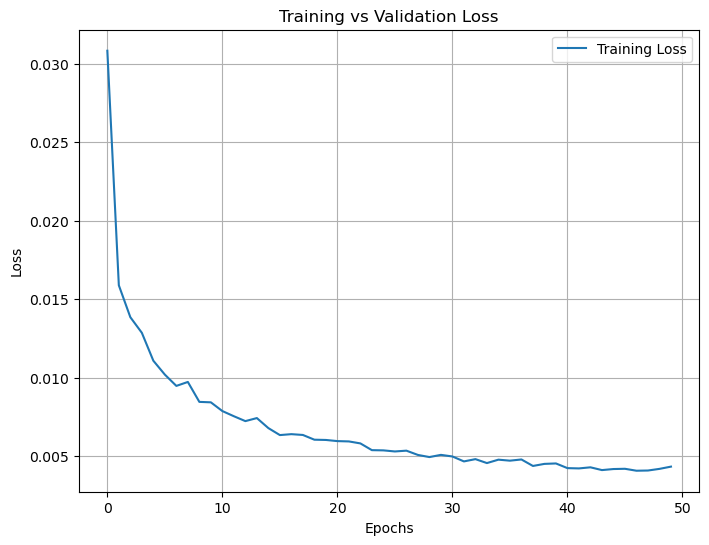

In [10]:
# Extract loss values
loss = history.history['loss']
# val_loss = history.history['val_loss']

# Plot training & validation loss
plt.figure(figsize=(8, 6))
plt.plot(loss, label='Training Loss')
# plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid()
plt.show()

In [11]:
# Prepare Test Data
data_test_scaled=scaler.transform(data_test)
# Convert data into sequences
def create_sequences(data_test, seq_length=30):
    X, y = [], []
    for i in range(len(data_test) - seq_length):
        X.append(data_test[i:i+seq_length])
        y.append(data_test[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 30  # Lookback period
X_test, y_test = create_sequences(data_test_scaled, seq_length)


In [12]:
X_test

array([[[0.61656051, 0.60997442, 0.63337714, ..., 0.07510434,
         0.76250212, 0.02552982],
        [0.61146497, 0.60741688, 0.61760841, ..., 0.04687471,
         0.76250212, 0.02481847],
        [0.59745223, 0.59846547, 0.61103811, ..., 0.06996758,
         0.76250212, 0.02412259],
        ...,
        [0.61057325, 0.63810742, 0.64296978, ..., 0.08711315,
         0.65163587, 0.03660847],
        [0.64076433, 0.63299233, 0.64270696, ..., 0.10420143,
         0.65163587, 0.03597922],
        [0.62547771, 0.63554987, 0.63771353, ..., 0.07190942,
         0.65163587, 0.03669836]],

       [[0.61146497, 0.60741688, 0.61760841, ..., 0.04687471,
         0.76250212, 0.02481847],
        [0.59745223, 0.59846547, 0.61103811, ..., 0.06996758,
         0.76250212, 0.02412259],
        [0.58598726, 0.58439898, 0.60183968, ..., 0.08473467,
         0.76250212, 0.02412259],
        ...,
        [0.64076433, 0.63299233, 0.64270696, ..., 0.10420143,
         0.65163587, 0.03597922],
        [0.6

In [13]:
X_test.shape

(354, 30, 9)

In [14]:
# Make Predictions
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
# y_test_actual = scaler.inverse_transform(y_test.reshape(-1,1))
y_test_actual = (scaler.inverse_transform(y_test.reshape(-1,9))).reshape(y_test.shape)

12/12 [==============================] - 1s 15ms/step


In [15]:
# Assuming 'Close' is the 0th feature and 'PE Ratio' is the 5th feature in the dataset
# Extract the actual test values
X_test_close = y_test_actual[:, 3]  # Actual Close values from test data
X_test_EPS = y_test_actual[:, 7]  # Actual PE Ratio values from test data
y_pred_close=y_pred[:,3]
y_pred_EPS=y_pred[:,7]


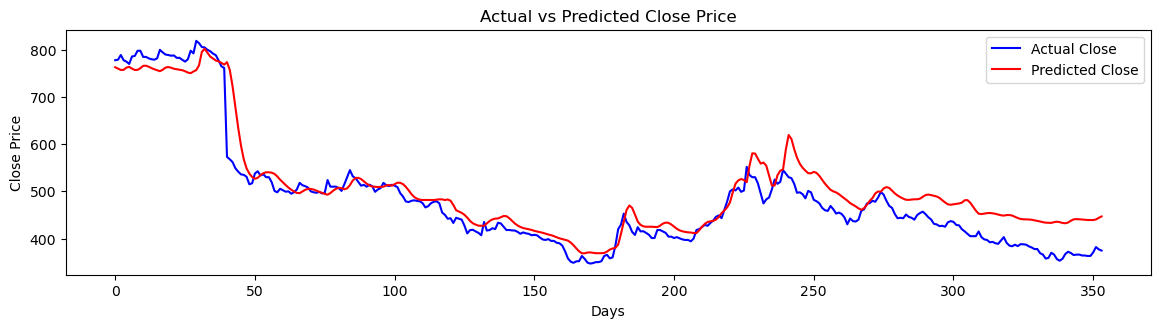

In [16]:
# Plot actual vs predicted values for Close and PE Ratio
plt.figure(figsize=(14, 7))

# Plot Close
plt.subplot(2, 1, 1)
plt.plot(X_test_close, label="Actual Close", color="blue")
plt.plot(y_pred_close, label="Predicted Close", color="red")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.title("Actual vs Predicted Close Price")
plt.legend()


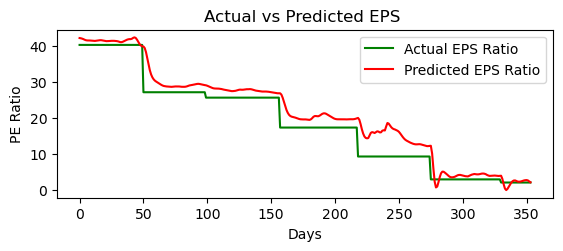

In [17]:
# Plot PE Ratio
plt.subplot(2, 1, 2)
plt.plot(X_test_EPS, label="Actual EPS Ratio", color="green")
plt.plot(y_pred_EPS, label="Predicted EPS Ratio",  color="red")
plt.xlabel("Days")
plt.ylabel("PE Ratio")
plt.title("Actual vs Predicted EPS ")
plt.legend()

In [18]:
##For Future prediction
last_50_datas=data_all[-seq_length:]

In [19]:
last_50_datas

,Open,High,Low,Close,per_change,Qty,Turnover,EPS,PE
1890,388.0,390.0,382.1,388.0,1.04,78034.0,30121853.6,2.91,133.333333
1891,395.7,395.7,384.0,387.8,-0.05,59219.0,22908320.5,2.91,133.264605
1892,393.5,393.5,383.0,387.0,-0.21,45107.0,17419527.1,2.91,132.989691
1893,386.0,388.0,381.0,383.4,-0.93,78694.0,30206337.5,2.91,131.752577
1894,385.0,385.2,381.0,381.0,-0.63,36094.0,13812729.1,2.91,130.927835
1895,388.6,388.6,377.5,377.6,-0.89,84072.0,31908096.2,2.91,129.759450
1896,370.1,384.0,370.1,377.8,0.05,51468.0,19446913.7,2.04,185.196078
1897,375.2,377.8,368.0,368.9,-2.36,67591.0,25110905.7,2.04,180.833333
1898,365.1,370.0,361.6,366.0,-0.79,83984.0,30679994.8,2.04,179.411765
1899,362.0,363.6,351.6,357.5,-2.32,187054.0,66767422.9,2.04,175.245098


In [20]:
#Scale the data
last_50_datas_scaled=scaler.transform(last_50_datas)

In [21]:
input_sequence=last_50_datas_scaled.copy()
input_data = np.expand_dims(input_sequence, axis=0)  # Reshape for model input

In [22]:
input_data.shape

(1, 30, 9)

In [23]:
input_data

array([[[0.11847134, 0.1112532 , 0.12759527, 0.11612903, 0.5161987 ,
         0.11562427, 0.05373109, 0.01915579, 0.44819776],
        [0.12828025, 0.1185422 , 0.13009198, 0.11587097, 0.45734341,
         0.08772432, 0.04085163, 0.01915579, 0.44794927],
        [0.12547771, 0.1157289 , 0.12877792, 0.11483871, 0.4487041 ,
         0.06679825, 0.03105162, 0.01915579, 0.44695532],
        [0.11592357, 0.10869565, 0.1261498 , 0.11019355, 0.40982721,
         0.11660295, 0.05388194, 0.01915579, 0.44248255],
        [0.11464968, 0.10511509, 0.1261498 , 0.10709677, 0.42602592,
         0.05343326, 0.02461183, 0.01915579, 0.43950071],
        [0.11923567, 0.10946292, 0.12155059, 0.10270968, 0.41198704,
         0.12457776, 0.05692036, 0.01915579, 0.43527642],
        [0.09566879, 0.10358056, 0.11182654, 0.10296774, 0.46274298,
         0.0762307 , 0.03467143, 0.00440753, 0.63570697],
        [0.10216561, 0.09565217, 0.10906702, 0.09148387, 0.33261339,
         0.1001388 , 0.04478425, 0.0044075

In [24]:
#making predictions
def predict_next_n_days(model, data_scaled, n_days):
    predictions=[]
    input_sequence=data_scaled.copy()

    for _ in range(n_days):
        input_data = np.expand_dims(input_sequence, axis=0)  # Reshape for model input
        next_day_features = model.predict(input_data, verbose=0)[0]  # Predict next day
        predictions.append(next_day_features)
        
        # Update input sequence: Remove first day, add predicted day
        next_day_input = np.append(input_sequence[1:], [next_day_features], axis=0)
        input_sequence = next_day_input
        
    return np.array(predictions)

In [25]:
# Example usage
# last_100_days = scaler.transform(last_100_days_raw)  # Normalize input if needed
predicted_features = predict_next_n_days(model, data_scaled=last_50_datas_scaled, n_days=400)

In [26]:
predicted_features

array([[0.18581171, 0.18633364, 0.19477737, ..., 0.0334989 , 0.00397667,
        0.6121063 ],
       [0.18708447, 0.18774167, 0.1961118 , ..., 0.03285195, 0.00408873,
        0.61466366],
       [0.1913766 , 0.19222042, 0.20050111, ..., 0.03253464, 0.00684705,
        0.6146688 ],
       ...,
       [0.29563797, 0.30046225, 0.30676028, ..., 0.03988425, 0.06888524,
        0.46623474],
       [0.29563788, 0.30046213, 0.30676022, ..., 0.03988436, 0.06888643,
        0.46623123],
       [0.29563782, 0.300462  , 0.30676013, ..., 0.03988449, 0.06888747,
        0.4662277 ]], dtype=float32)

In [27]:
predicted_features_inverse = scaler.inverse_transform(predicted_features)

In [28]:
predicted_features_inverse

array([[4.4086221e+02, 4.4871292e+02, 4.3322559e+02, ..., 1.8790200e+07,
        2.0145838e+00, 1.7866844e+02],
       [4.4186130e+02, 4.4981396e+02, 4.3424109e+02, ..., 1.8427854e+07,
        2.0211942e+00, 1.7937576e+02],
       [4.4523062e+02, 4.5331635e+02, 4.3758133e+02, ..., 1.8250138e+07,
        2.1839077e+00, 1.7937718e+02],
       ...,
       [5.2707581e+02, 5.3796149e+02, 5.1844458e+02, ..., 2.2366508e+07,
        5.8435402e+00, 1.3832214e+02],
       [5.2707574e+02, 5.3796136e+02, 5.1844452e+02, ..., 2.2366570e+07,
        5.8436103e+00, 1.3832118e+02],
       [5.2707568e+02, 5.3796130e+02, 5.1844446e+02, ..., 2.2366644e+07,
        5.8436718e+00, 1.3832021e+02]], dtype=float32)

In [29]:
predicted_features_inverse[0]

array([ 4.4086221e+02,  4.4871292e+02,  4.3322559e+02,  4.4749500e+02,
       -5.5224895e-02,  3.3388734e+04,  1.8790200e+07,  2.0145838e+00,
        1.7866844e+02], dtype=float32)

In [30]:
predicted_features_inverse[0][3]

447.495

In [31]:
x_future_close=predicted_features_inverse[:, 3]
x_future_EPS=predicted_features_inverse[:,7]


In [32]:
x_future_close

array([447.495  , 448.53052, 451.87323, 457.74823, 465.25366, 473.22733,
       480.77753, 487.46063, 493.125  , 497.83078, 501.73447, 504.98788,
       507.72144, 510.06738, 512.09595, 513.8593 , 515.4031 , 516.76587,
       517.9825 , 519.08527, 520.0871 , 520.9974 , 521.83496, 522.6105 ,
       523.32764, 523.995  , 524.61584, 525.1865 , 525.7122 , 526.2125 ,
       526.6779 , 527.1018 , 527.497  , 527.86346, 528.20166, 528.51263,
       528.79816, 529.05994, 529.30005, 529.52026, 529.72217, 529.9072 ,
       530.07684, 530.23224, 530.3747 , 530.50525, 530.6249 , 530.7345 ,
       530.83514, 530.9274 , 531.0121 , 531.08984, 531.1612 , 531.22675,
       531.2869 , 531.3422 , 531.393  , 531.4397 , 531.48254, 531.52185,
       531.5579 , 531.59106, 531.6214 , 531.6492 , 531.6746 , 531.6979 ,
       531.7191 , 531.73846, 531.75616, 531.77216, 531.7867 , 531.7998 ,
       531.81165, 531.82227, 531.83185, 531.8404 , 531.84796, 531.85455,
       531.8604 , 531.8654 , 531.86975, 531.8735 , 

In [33]:
x_future_close.shape

(400,)

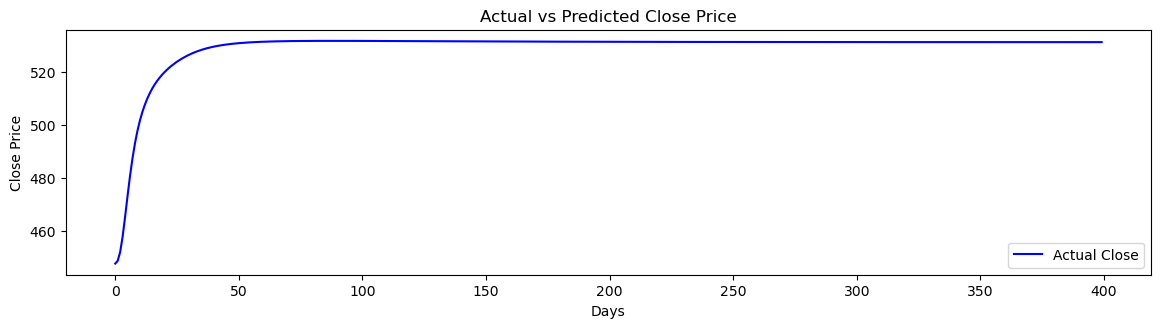

In [34]:
# Plot actual vs predicted values for Close and PE Ratio
plt.figure(figsize=(14, 7))

# Plot Close
plt.subplot(2, 1, 1)
plt.plot(x_future_close, label="Actual Close", color="blue")
# plt.plot(y_pred_close, label="Predicted Close", color="red")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.title("Actual vs Predicted Close Price")
plt.savefig('future_predict')
plt.legend()


In [35]:
predicted_data=predicted_features_inverse

In [36]:
predicted_features_inverse.shape

(400, 9)

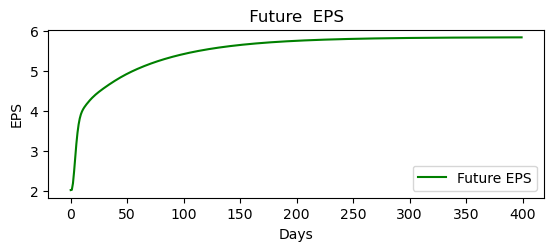

In [37]:
# Plot PE Ratio
plt.subplot(2, 1, 2)
plt.plot(x_future_EPS, label="Future EPS", color="green")
# plt.plot(y_pred_EPS, label="Predicted EPS Ratio",  color="red")
plt.xlabel("Days")
plt.ylabel("EPS")
plt.title(" Future  EPS ")
plt.legend()

In [38]:
# predicted_data.t
df=pd.DataFrame(predicted_data)
df.to_csv("prediction.csv", index=False)